# Unidad 2 Tarea 1
## Problema del PageRank
Fecha de entrega miércoles 14 de febrero del 2024.

Miguel Omar Solis Rodriguez

LCC

Computo Cientifico

## Introducción:

Los eigenvalores y eigenvectores son conceptos fundamentales en álgebra lineal y tienen una amplia aplicación en diversas áreas, incluida la modelización de sistemas dinámicos como el modelo de Leslie para la dinámica de poblaciones. Los eigenvalores representan la escala de cambio en un sistema lineal, mientras que los eigenvectores indican la dirección de ese cambio. En el contexto del modelo de Leslie, estos conceptos son esenciales para comprender cómo evolucionan las estructuras de edad en una población a lo largo del tiempo.

El modelo de Leslie es una herramienta poderosa utilizada para predecir la dinámica de poblaciones en función de la estructura por edades y las tasas de reproducción y mortalidad. Al emplear los eigenvalores y eigenvectores de la matriz de Leslie, podemos determinar la estabilidad a largo plazo de una población y analizar cómo factores como la tasa de crecimiento y la estructura por edades influyen en su comportamiento a lo largo del tiempo.

<h1> Vectores y valores propios<h1>
RankPage

Vivimos en la era de las computadoras. Internet forma parte de nuestro día a día y la información está a sólo un clic de distancia. Simplemente abra su motor de búsqueda favorito, como Google, AltaVista, Yahoo, escriba las palabras clave y el motor de búsqueda mostrará las páginas relevantes para su búsqueda. Pero, ¿cómo funciona realmente un motor de búsqueda?


Para este objetivo, comenzamos imaginando la red Web como un grafo dirigido, con los nodos representados por páginas web y los bordes representados por los enlaces entre ellas.


Supongamos, por ejemplo, que tenemos una pequeña red de Internet que consta de sólo 4 sitios web www.page1.com, www.page2.com, www.page3.com, www.page4.com, referenciados entre sí en la forma sugerida en la lista :

<table>
  <tr style="background-color: rgb(102, 255, 153);">
    <td><form action="#">
      <label for="lang">www.page1.com</label>
      <select name="lenguajes" id="lang">
        <option value="selecciona">Selecciona una página</option>
        <option value="javascript">www.page2.com</option>
        <option value="php">www.page3.com</option>
        <option value="java">www.page4.com</option>
      </select>
</form></td>
    <td><form action="#">
      <label for="lang">www.page2.com</label>
      <select name="lenguajes" id="lang">
        <option value="selecciona">Selecciona una página</option>
        <option value="javascript">www.page3.com</option>
        <option value="php">www.page4.com</option>
      </select>
</form></td>
    <td><form action="#">
      <label for="lang">www.page3.com</label>
      <select name="lenguajes" id="lang">
        <option value="selecciona">Selecciona una página</option>
        <option value="javascript">www.page1.com</option>
      </select>
</form></td>
    <td><form action="#">
      <label for="lang">www.page4.com</label>
      <select name="lenguajes" id="lang">
        <option value="selecciona">Selecciona una página</option>
        <option value="javascript">www.page3.com</option>
        <option value="javascript">www.page1.com</option>
      </select></td>
  </tr>
</table>

a) Traduzca la lista combinada a  un grafo dirigido con 4 nodos, uno para cada sitio web. Cuando el sitio web i hace referencia a j , agregue un borde dirigido entre el nodo i y el nodo j en el grafo. Con el fin de calcular el ranking de su página, ignore cualquier enlace de navegación, como los botones Atrás y Siguiente, solo tome encuenta las conexiones entre diferentes sitios web.

## Solución
En este reporte, vamos a explorar cómo construir un grafo dirigido utilizando NetworkX y calcular el PageRank de cada nodo en el grafo. Utilizaremos un ejemplo simple para demostrar estos conceptos.
Primero, definimos el grafo dirigido utilizando la biblioteca NetworkX. El grafo representará un conjunto de páginas web y sus conexiones.
Ahora, visualizaremos el grafo utilizando matplotlib.
Luego, calcularemos el PageRank de cada nodo en el grafo.
Finalmente, mostraremos los resultados del cálculo del PageRank.

En este reporte, hemos aprendido cómo construir un grafo dirigido utilizando NetworkX, visualizarlo y calcular el PageRank de cada nodo en el grafo. Este análisis es fundamental para comprender la importancia relativa de cada página en una red de páginas web.

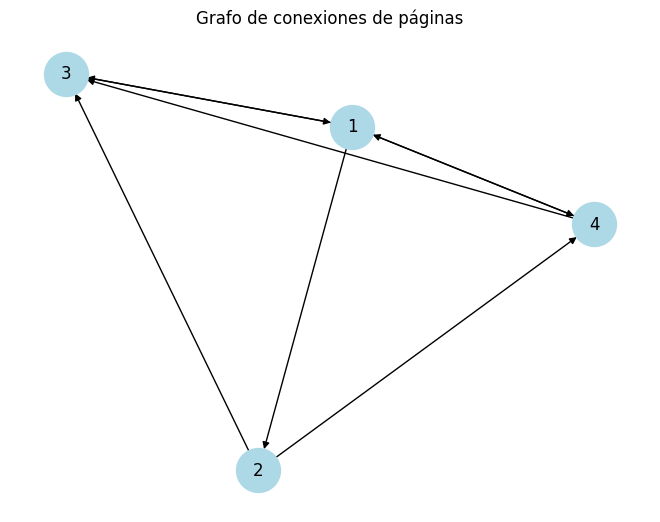

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir el grafo
grafo = {
    1: [2, 3, 4],
    2: [3, 4],
    3: [1],
    4: [3, 1]
}

# Crear un objeto de grafo dirigido
G = nx.DiGraph()

# Agregar nodos al grafo
for pagina in grafo:
    G.add_node(pagina)

# Agregar aristas al grafo
for pagina, conexiones in grafo.items():
    for conexion in conexiones:
        G.add_edge(pagina, conexion)

# Dibujar el grafo
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, arrows=True)
plt.title('Grafo de conexiones de páginas')
plt.show()


b) En el modelo, cada página debe transferir uniformemente su importancia a las páginas a las que enlaza. Denote por $x_1$ , $x_2$ , $x_3$ y $x_4$ la importancia de las cuatro páginas. Analice la situación en cada nodo y obtenga un sistema lineal, represente su sistema en la forma $Ax=x$

$
\begin{align}
    X_1 &= X_3 + \frac{1}{2}X_4 \\ \\
    X_2 &= \frac{1}{3}X_1 \\ \\
    X_3 &= \frac{1}{3}X_1 + \frac{1}{2}X_2 + \frac{1}{2}X_4 \\ \\
    X_4 &= \frac{1}{3}X_1 + \frac{1}{2}X_2
\end{align}
$

En este reporte, analizaremos un sistema de ecuaciones lineales que surge del algoritmo de PageRank, utilizado para calcular la importancia relativa de las páginas web en una red.

## Forma Matricial

Podemos escribir esto en forma matricial como \( Ax = x \), donde:

$
A = \begin{bmatrix}
0 & 0 & 1 & \frac{1}{2} \\
\frac{1}{3\vphantom{1/2}} & 0 & 0 & 0 \\
\frac{1}{3\vphantom{1/2}} & \frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{3\vphantom{1/2}} & \frac{1}{2} & 0 & 0
\end{bmatrix} 
$

$
x = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
$
​
 
Cada fila de la matriz A representa una ecuación del sistema, que modela las relaciones de flujo entre las páginas web. La matriz A se construye utilizando las conexiones entre las páginas, donde los elementos no nulos indican la existencia de un enlace de una página a otra.

Resolver este sistema de ecuaciones proporciona los valores de x que representan las importancias relativas de las páginas web en la red. El algoritmo de PageRank utiliza estos valores para clasificar las páginas según su relevancia en función de la estructura de la red.

c) Hallar el vector propio de la matriz $A$ asociado al valor propio $\lambda=1$ ¿Cuál es la razón de seleccionar $\lambda=1$?


Para encontrar el vector propio de la matriz A asociado al valor propio, $\lambda $ = 1, primero utilizamos la ecuación característica de (A - $\lambda $ I)= 0 , donde A es la matriz dada y I es la matriz identidad

Esto nos lleva al siguiente sistema de ecuaciones:

$
\begin{align}
    -x_1 + x_3 + \frac{1}{2}x_4 = 0\\
    \frac{1}{3}x_1 - x_2 = 0\\
    \frac{1}{3}x_1 + \frac{1}{2}x_2 -x_3 + \frac{1}{2}x_4= 0\\
    \frac{1}{3}x_1 + \frac{1}{2}x_2 -x_4 = 0\\
\end{align}
$

Resolviendo este sistema, encontramos $x_3$ se obtiene apartir del valor de $x_2$ y $x_4$:

$\begin{align*}
   x_2 &= \frac{1}{3}x_1 \\
   x_4 &= \frac{1}{2}x_1 \\
   x_3 &= \frac{3}{4}x_1 \\
\end{align*}
$

Por lo tanto, el vector propio correspondiente a $\lambda $ = 1  es cualquier vector de la forma:

$
V =
\begin{pmatrix}
   2 \\
   \frac{2}{3} \\
   \frac{3}{2} \\
   1
\end{pmatrix}
$


d) Suponga que inicialmente la importancia se distribuye uniformemente entre los 4 nodos y cada uno obtiene ¼. Denota por $x_0$ el vector de rango inicial, en el que todas las entradas son iguales a ¼. construya una función que tenga como entradas la matrix A, el vector inicial $x_0$ y el número de iteraciones. Use la fución para hallar el vector propio dominante (vector PageRank de del grafo web). Mencione la página de mayor relevancia. ¿Qué concluye al tener conocimiento de  la página de mayor relevancia?

Implementamos un metodo para calcular el vector propio dominante de la matriz A, junto con su vector inicial para obtener el arreglo. Este codigo lo obtuvimos gracias al aporte del profesor en clases.

In [2]:
import numpy as np

def MetodoP(a, x, iter):
    for i in range(iter):
        x = np.dot(a, x)
    return x

x = np.array([1/4, 1/4, 1/4, 1/4])
a = np.array([[0, 0, 1, 1/2],
              [1/3, 0, 0, 0],
              [1/3, 1/2, 0, 1/2],
              [1/3, 1/2, 0, 0]])
iter = 6
resultado = MetodoP(a, x, iter)
print(resultado)

[0.38194444 0.13020833 0.29166667 0.19618056]


### EL MODELO DE LESLIE PARA LA DINAMICA DE POBLACIONES.


Uno de los modelos que utilizan los demógrafos para predecir el crecimiento de una población es el modelo de Leslie. Este modelo se desarrolló alrededor de 1940.


El modelo describe el crecimiento numérico de una población humana, animal o vegetal, la cuál es dividida en clases que se definen tomando en cuenta rangos de edad, peso, altura, u otros parámetros.

Dividiendo la población inicial en $n$ clases, se forma un vector columna, llamado vector de la distribución inicial de clase $x^{(0)}$ es igual

\begin{pmatrix} x_{1}^{(0)}\\ v_{2}^{(0)} \\ \vdots \\ x_{n}^{(0)} \end{pmatrix}

donde los $x^{(0)}_i$ $i=1,2,...,n$ son el número de elementos en cada clase, en un tiempo inicial $t=0$.


Conforme transcurre el tiempo y debido a los procesos naturales (nacimiento, envegecimiento y muerte), cambia el número de elementos de cada una de las $n$ clases. Describiendo los procesos naturales cuantitativamente, el vector de la distribución inicial de clases puede proyectarse hacia el futuro.

Denotemos al vector de la distribución de clases en cualquier tiempo $t_k$ como:
$x^{k}$ igual
\begin{pmatrix} x_{1}^{(k)}\\ v_{2}^{(k)} \\ \vdots \\ x_{n}^{(k)} \end{pmatrix} \

donde los $x^{k}_i$ son el número de elementos de la clase de orden $i$ en el tiempo $t_k$.

Los procesos naturales pueden describirse con los siguientes parámetros:

a) $a_i$ Es el número promedio de hijas que tiene una hembra de la clase de orden $i$.


b)$b_i$ Es la probabilidad de que un elemento de la clase de orden $i$ sobreviva y pase a la clase siguiente $(i+1)$.

 el inciso a) y b) se interpreta matemáticamente como
 

$a_i\geq 0$	para $i=1,2,...,n$


$0  ≤ b_i ≤ 1$ para $i=1,2,...,n-1$


Represente en lenguaje algebraico lo siguiente: 

i) En el tiempo $t_k$ , el número de elementos de la primera clase, serán únicamente los elementos nacidos entre los tiempos $t_{k-1}$ y $t_{k}$.



### Cálculo del número de elementos de la primera clase en el tiempo t_k

Dado el modelo de Leslie para la dinámica de poblaciones, queremos calcular el número de elementos de la primera clase en el tiempo $t_k$, que son únicamente los elementos nacidos entre los tiempos $t_{k-1}$ y $ t_{k}$.

Usando la información proporcionada sobre los procesos naturales y la distribución de clases en el tiempo $t_k$, representamos el número de elementos de la primera clase en el tiempo $t_k$ como:

$$
\begin{align}
    x_1^{k} = a_1x_1^{k-1}+a_2x_2^{k-1} + \cdots + a_nx_n^{k-1}
\end{align}
$$

Donde:
- $ x_{1}(k) $ representa el valor de la variable en el tiempo discreto k.
- $ x_{1}(k-1) $ representa el valor de la misma variable en el tiempo discreto anterio((  k -).

- $ ( {a}, , {a}_...t , {a} $ ) son coeficientes que determinan cómo influyen los valores anteriores de otras variable$ ( {x}_, {x}_...t, {x} $_ ) en el valor actual \$( x$_).


ii) Ahora, el número de elementos de la clase de orden $(i+1)$, en el tiempo $t_k$ , es igual al número de elementos de la clase
de orden $i$ en el tiempo $t_{k-1}$, que sobreviven en el tiempo $t_k$.


### Cálculo del número de elementos de la clase de orden i+1 en el tiempo $t_k$

Dado el modelo de Leslie para la dinámica de poblaciones, queremos calcular el número de elementos de la clase de orden $i+1$ en el tiempo $t_k$. Esto es igual al número de elementos de la clase de orden i en el tiempo $t_{k-1}$ que sobreviven hasta el tiempo $t_k$.

Usando la información proporcionada sobre los procesos naturales y la distribución de clases en el tiempo $t_k$, representamos el número de elementos de la clase de orden i+1 en el tiempo $t_k$ como:

$$
\begin{align}
    x_{i+1}^{(k)} = b_i \cdot x_i^{(k-1)}
\end{align}
$$


Donde:
- $x_{i+1}^{(k)}$ es el número de elementos de la clase de orden i+1 en el tiempo $t_k$.
- $x_i^{(k-1)}$ es el número de elementos de la clase \(i\) en el tiempo $t_{k-1}$.
- $b_i$ es la probabilidad de que un elemento de la clase de orden \(i\) sobreviva y pase a la clase siguiente \(i+1\).


iii) Utilizando la notación matricial, escriba i) y ii) en forma matricial, la matriz que obtiene se llama matriz de Leslie.

### Forma matricial de las ecuaciones i) y ii)

Dado el modelo de Leslie para la dinámica de poblaciones, podemos representar las ecuaciones i) y ii) en forma matricial.

Definimos las matrices siguientes:
-  A: La matriz de nacimientos, donde $ A_{i,j} $ representa el número promedio de hijas que tiene una hembra de la clase de orden j que contribuyen a la clase de orden i .
- B : La matriz de supervivencia, donde $ B_{i,j} $ representa la probabilidad de que un elemento de la clase de orden j sobreviva y pase a la clase siguiente (i+1).

Entonces, las ecuaciones i) y ii) se pueden escribir en forma matricial como sigue:

i) $x^{(k)} = A \cdot x^{(k-1)} $

ii) $ x^{(k)} = B \cdot x^{(k-1)} $

Al combinar estas ecuaciones, obtenemos la ecuación:

$ x^{(k)} = B \cdot A \cdot x^{(k-1)} $

Esta ecuación representa la evolución de la distribución de clases de una generación a la siguiente. La matriz $ B \cdot A $ es conocida como la matriz de Leslie.


iv) Considérese una población animal (exclusiva mente hembras) ficticia que consiste de 1000 animales con edad entre 0 y 1, 800 animales con edad entre 1 y 2  y  600 con edad entre 2 y 3. Se supone que ninguno de los animales vive más de tres años. 


### Distribución inicial de la población animal

Dado que la población animal ficticia se divide en tres clases según el rango de edad (0-1 año, 1-2 años y 2-3 años), representamos la distribución inicial de la población en forma de vector de distribución de clases:

$ x_{0} = \begin{pmatrix} 1000 \\ 
800 \\ 
600 \end{pmatrix} $

Esto significa que hay 1000 animales en la clase de edad 0-1 año, 800 animales en la clase de edad 1-2 años y 600 animales en la clase de edad 2-3 años.


v) Considere lo siguiente:La mitad de los animales de la clase 1 sobrevivirán para estar en la clase 2 el próximo año, la mitad de los animales de la clase 2 sobrevivirán para estar en la clase 3 el próximo año. Los animales de la clase 1 no producen hijos, cada animal de la clase 2 produce 1 hijo en promedio, y cada animal de la clase 3 produce 2 hijos en promedio. Con estos
datos se forme la matriz de Leslie.

### Matriz de Leslie

Dado que la mitad de los animales de la clase 1 sobreviven para estar en la clase 2 el próximo año, la mitad de los animales de la clase 2 sobreviven para estar en la clase 3 el próximo año, y los animales de la clase 1 no producen hijos, cada animal de la clase 2 produce 1 hijo en promedio, y cada animal de la clase 3 produce 2 hijos en promedio, podemos formar la matriz de Leslie con esta información.

La matriz de Leslie se define como sigue:

$
L = \begin{pmatrix}
0 & 1 & 2 \\
0.5 & 0 & 0 \\
0 & 0.5 & 0 \\
\end{pmatrix}
$

Donde:
- La primera fila representa los nacimientos para cada clase.
- Las siguientes filas representan las probabilidades de supervivencia para pasar a la clase siguiente.


Basados en iv), v) y usando el método de potencia responda las siguientes preguntas

vi)¿Cuál es la distribución én las clases después de un año?

vii)¿Cuál es la distribución de edades después de 2 años?


viii) ¿Qué se puede decir acerca del vector de distribución $x^{(k)}$? suponga $k=64$

In [3]:
import numpy as np

# Matriz de Leslie
L = np.array([
    [0, 1, 2],
    [0.5, 0, 0],
    [0, 0.5, 0]
])

# Vector de distribución inicial
x0 = np.array([1000, 800, 600])

# Calcular la distribución después de 1 año
x1 = np.dot(L, x0)
print("Distribución después de 1 año:")
print(x1)

# Calcular la distribución después de 2 años
x2 = np.dot(L, x1)
print("\nDistribución después de 2 años:")
print(x2)

# Método de potencia para estimar la distribución después de 64 años
x_k = x0
for _ in range(64):
    x_k = np.dot(L, x_k)

print("\nDistribución después de 64 años:")
print(x_k)


Distribución después de 1 año:
[2000.  500.  400.]

Distribución después de 2 años:
[1300. 1000.  250.]

Distribución después de 64 años:
[1519.99999988  760.00000001  380.00000005]


Podemos concluir que el numero de animales eventualmente crecerá a medida que sigamos aumentando los años.


## Conclusión:

En conclusión, los eigenvalores y eigenvectores son conceptos esenciales en el análisis de sistemas dinámicos como el modelo de Leslie para la dinámica de poblaciones. Proporcionan información crítica sobre la estabilidad y el comportamiento a largo plazo de una población en función de su estructura por edades y las tasas de reproducción y mortalidad. Al comprender y aplicar estos conceptos, podemos obtener información valiosa sobre la evolución de las poblaciones y tomar decisiones informadas sobre políticas y estrategias de gestión para garantizar su sostenibilidad a largo plazo.